<a href="https://colab.research.google.com/github/jayantrathi1501/ml_projects/blob/main/Whatsapp_chat_analysis_by_jayant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install emoji 
!pip install wordcloud
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 4.4 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=183cfffa24ea69159f729cc79a4daeea2905594732c89fa138c1fd8d2de6f8e9
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [3]:
data = []

conversation = '/content/WhatsApp Chat with Lucky Bhaiya.txt'

with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [4]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

           Date   Time        Author  \
2527 2022-03-08  23:32        Jayant   
2528 2022-03-08  23:32        Jayant   
2529 2022-03-08  23:32        Jayant   
2530 2022-03-08  23:32  Lucky Bhaiya   
2531 2022-03-08  23:32        Jayant   
2532 2022-03-08  23:32  Lucky Bhaiya   
2533 2022-03-08  23:32  Lucky Bhaiya   
2534 2022-03-08  23:32        Jayant   
2535 2022-03-08  23:32  Lucky Bhaiya   
2536 2022-03-08  23:32  Lucky Bhaiya   
2537 2022-03-08  23:32        Jayant   
2538 2022-03-08  23:33        Jayant   
2539 2022-03-08  23:33        Jayant   
2540 2022-03-08  23:33  Lucky Bhaiya   
2541 2022-03-08  23:33  Lucky Bhaiya   
2542 2022-03-08  23:34  Lucky Bhaiya   
2543 2022-03-08  23:34  Lucky Bhaiya   
2544 2022-03-08  23:34  Lucky Bhaiya   
2545 2022-03-08  23:35  Lucky Bhaiya   
2546 2022-03-08  23:35  Lucky Bhaiya   

                                            Message  
2527                                       Atakta h  
2528                       Bohot dikt aati reheti h

In [5]:
total_messages = df.shape[0]
print(total_messages)

media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)


2547
147


In [6]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.distinct_emoji_list(word) for char in word):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

391


In [7]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between Lucky and jayant")
print("Total Messages: ", total_messages)
# print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Chats between Lucky and jayant
Total Messages:  2547
Number of Emojis Shared 391
Number of Links Shared 31


In [8]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1
l = ["Lucky Bhaiya", "Jayant"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)

Stats of Lucky Bhaiya -
Messages Sent 1218
Average Words per message 2.2389162561576357
Emojis Sent 126
Links Sent 0
Stats of Jayant -
Messages Sent 1139
Average Words per message 3.5030728709394205
Emojis Sent 265
Links Sent 1


In [9]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis= len(total_emojis_list)

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(),key=lambda x:x[1], reverse=True)

for i in emoji_dict:
    print(i)

emoji_df = pd.DataFrame(emoji_dict, columns=['emoji','count'])

import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

('😂', 202)
('🤭', 35)
('🤣', 31)
('🤗', 12)
('😍', 8)
('🥺', 7)
('😝', 7)
('🥳', 6)
('🤩', 6)
('🙂', 5)
('😎', 5)
('😏', 4)
('🤑', 4)
('🙈', 4)
('🤧', 3)
('👌', 3)
('✨', 3)
('🥵', 3)
('😚', 3)
('😊', 2)
('💯', 2)
('😌', 2)
('💙', 2)
('😆', 2)
('🙊', 2)
('😗', 2)
('😭', 2)
('\U0001fae1', 2)
('😥', 1)
('👉', 1)
('⏳', 1)
('💓', 1)
('🙁', 1)
('\U0001f972', 1)
('😒', 1)
('😔', 1)
('👍', 1)
('🙉', 1)
('🤪', 1)
('😁', 1)
('🦕', 1)
('🥂', 1)
('🔗', 1)
('🍩', 1)
('📅', 1)
('⏰', 1)
('🎀', 1)
('\U0001fae2', 1)
('✔', 1)
('🌚', 1)


There are 35897 words in all the messages.


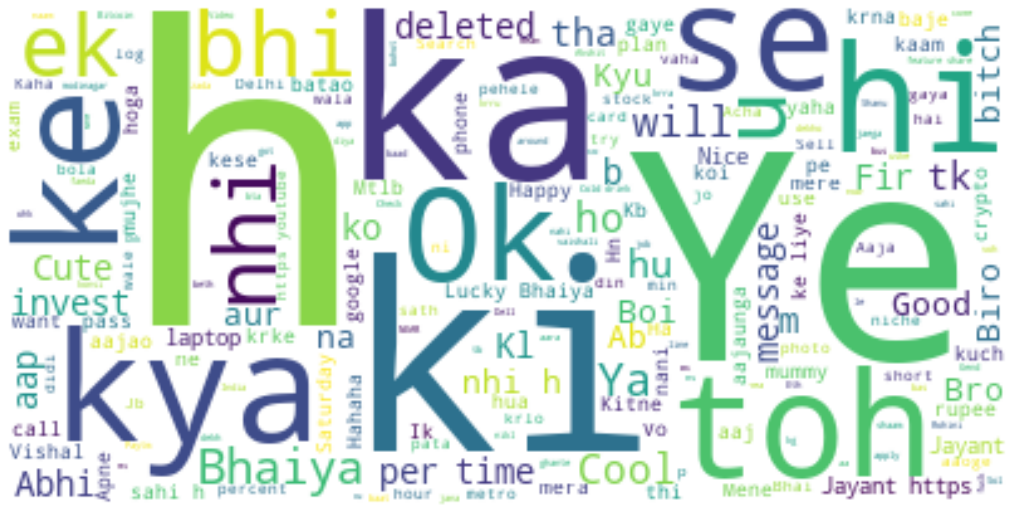

In [10]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(18,18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Lucky Bhaiya


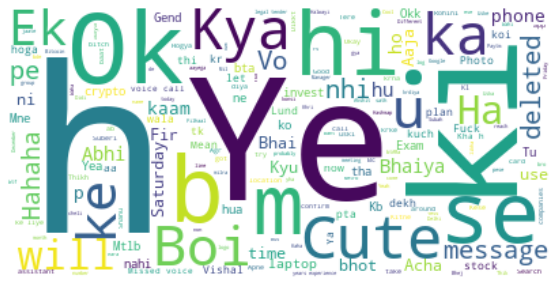

Author name Jayant


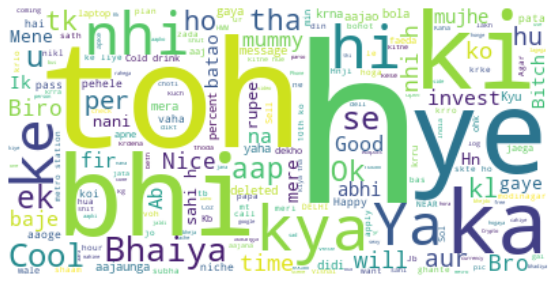

In [11]:
l = ["Lucky Bhaiya", "Jayant"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()